In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\house_prices_switzerland.csv")

In [3]:
df.describe

<bound method NDFrame.describe of                ID         HouseType Size      Price  LotSize Balcony  \
0      5948775981      Single House    S  1181310.0   1201.0     Yes   
1      6133660218      Single House    S   360990.0      NaN     Yes   
2      6134820690      Single House    S  1252710.0      NaN     Yes   
3      2380900741         Row House    M  1010250.0      NaN     Yes   
4      7177723491      Single House    S  1515370.0   1201.0     Yes   
...           ...               ...  ...        ...      ...     ...   
16695  3508920234             Villa    M        NaN   2500.0     Yes   
16696  5252858658  Bifamiliar House    M  1751080.0    254.0     Yes   
16697  2519071439      Single House    S  1313320.0    601.0     NaN   
16698  2675511974      Single House    M  3758130.0    618.0     NaN   
16699  4270190079      Single House    M  3219330.0    338.0     NaN   

       LivingSpace  NumberRooms  YearBuilt           Locality  PostalCode  
0            160.0       

In [4]:
df.isnull().sum()  #check  how many null values we have , i rerun this to check if the below codes are ok 

ID                0
HouseType         0
Size              0
Price          1809
LotSize         800
Balcony        7376
LivingSpace     778
NumberRooms    1824
YearBuilt      6429
Locality          0
PostalCode        0
dtype: int64

In [5]:
df.dropna(subset=['Price'], inplace=True) #Removes the missing values

In [6]:
df.dropna(subset=['Balcony'], inplace=True)

In [7]:
df.isnull().sum()

ID                0
HouseType         0
Size              0
Price             0
LotSize         305
Balcony           0
LivingSpace     458
NumberRooms    1167
YearBuilt      3067
Locality          0
PostalCode        0
dtype: int64

In [8]:
avg_price_by_type = df.groupby('HouseType')['Price'].mean().reset_index()

In [9]:
sns.color_palette("Blues")

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

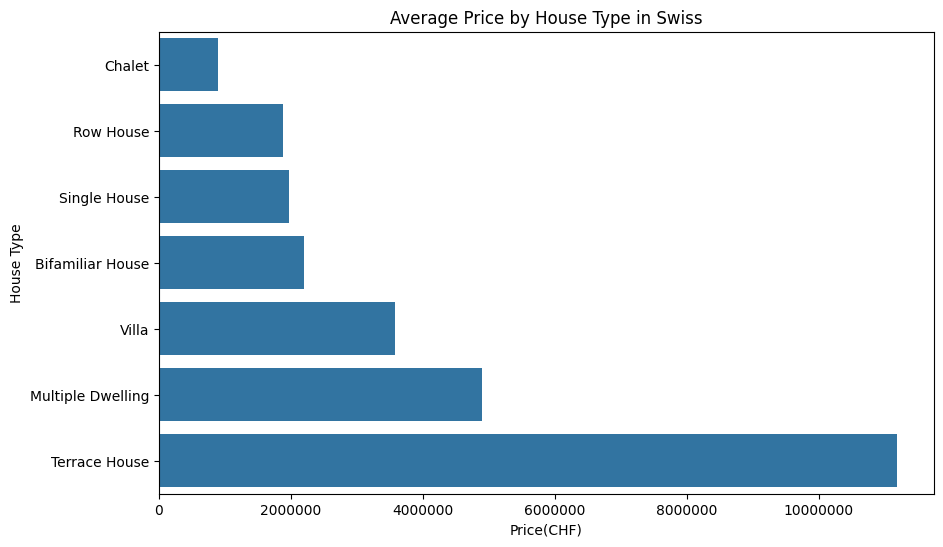

In [16]:
#create the bar plot 
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain')
bar_plot = sns.barplot(x= 'Price', y='HouseType', data=avg_price_by_type, order=avg_price_by_type.sort_values('Price', ascending=True).HouseType)
plt.title('Average Price by House Type in Swiss')
plt.xlabel('Price(CHF)')
plt.ylabel('House Type')
plt.show()

  Balcony         Price
0      No  1.420292e+06
1     Yes  2.478402e+06


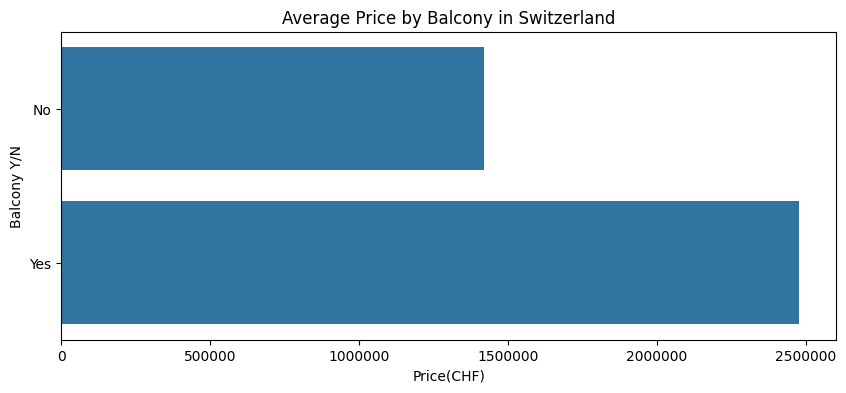

In [24]:
#How balcony affect on Price
grouped_by_balcony = df.groupby('Balcony')['Price'].mean().reset_index()
print(grouped_by_balcony)
plt.figure(figsize=(10,4))
plt.ticklabel_format(style='plain')
bar_plot = sns.barplot(x= 'Price', y='Balcony', data=grouped_by_balcony, order=grouped_by_balcony.sort_values('Price', ascending=True).Balcony)
plt.title('Average Price by Balcony in Switzerland')
plt.xlabel('Price(CHF)')
plt.ylabel('Balcony Y/N')
plt.show()

In [25]:
df.head(5)

,ID,HouseType,Size,Price,LotSize,Balcony,LivingSpace,NumberRooms,YearBuilt,Locality,PostalCode
0,5948775981,Single House,S,1181310.0,1201.0,Yes,160.0,3.0,2022.0,L'Orient,1341
1,6133660218,Single House,S,360990.0,NaN,Yes,35.0,2.5,NaN,Wil SG,9500
2,6134820690,Single House,S,1252710.0,NaN,Yes,220.0,4.5,2023.0,Biasca,6710
3,2380900741,Row House,M,1010250.0,NaN,Yes,NaN,5.5,2024.0,Tramelan,2720
4,7177723491,Single House,S,1515370.0,1201.0,Yes,220.0,5.0,2022.0,L'Orient,1341


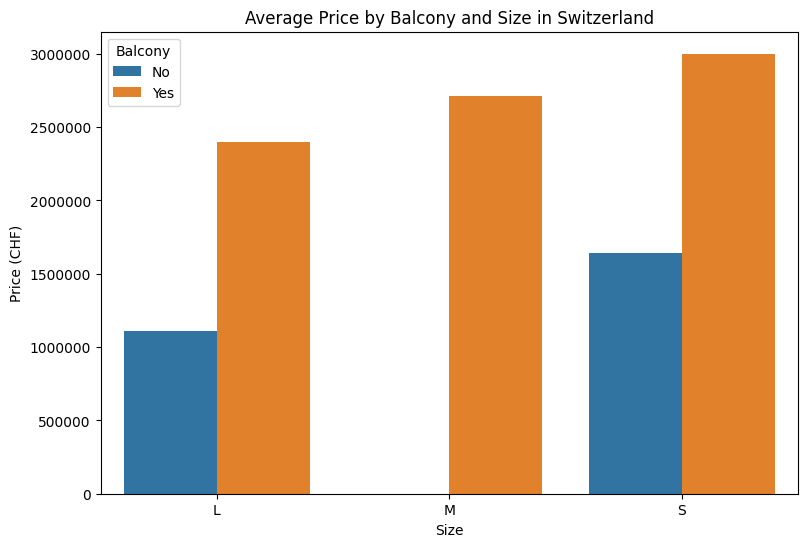

In [36]:

# Group by 'Size' and 'Balcony', then calculate the mean price
grouped_by_balcony_size = df.groupby(['Size', 'Balcony'])['Price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(9, 6))
plt.ticklabel_format(style='plain')

# Corrected: Use 'x' as 'Size', 'y' as 'Price', and 'hue' as 'Balcony'
bar_plot = sns.barplot(x='Size', y='Price', data=grouped_by_balcony_size, hue='Balcony')

plt.title('Average Price by Balcony and Size in Switzerland')
plt.xlabel('Size')
plt.ylabel('Price (CHF)')
plt.legend(title="Balcony")
plt.show()


<Figure size 1200x800 with 0 Axes>

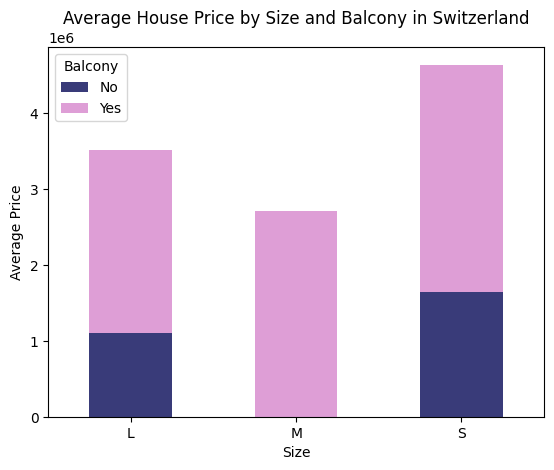

In [ ]:
# Grouping the data by Size and Balcony, then calculating the average price
grouped_data_balcony = df.groupby(['Size','Balcony'])['Price'].mean().unstack().fillna(0)
# Creating a stacked bar plot
plt.figure(figsize=(12, 8))
grouped_data_balcony.plot(kind='bar', cmap='tab20b', stacked='true')
plt.title('Average House Price by Size and Balcony in Switzerland')
plt.xlabel('Size')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.legend(title='Balcony')
plt.show()

In [45]:
#Heatmap
df.dropna(subset=['LivingSpace'], inplace=True)

In [46]:
df.dropna(subset=['NumberRooms'], inplace=True)

In [47]:
df.dropna(subset=['YearBuilt'], inplace=True)

<Axes: >

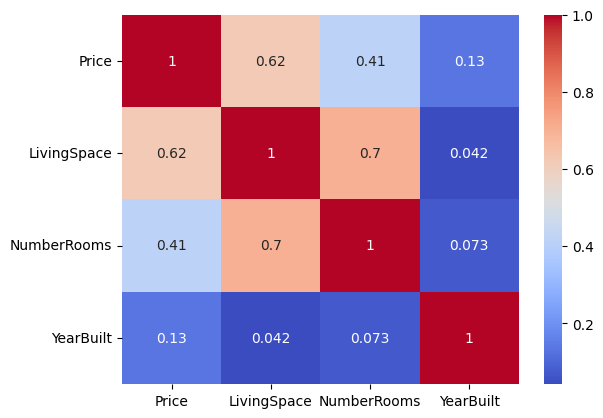

In [50]:
numerical_col = df[['Price', 'LivingSpace', 'NumberRooms', 'YearBuilt']]
corr = numerical_col.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')